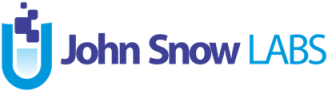

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/ASDiv_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [ ]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [3]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## ASDiv
[ASDiv](https://www.aclweb.org/anthology/2020.acl-main.92/)

**Dataset Summary**

**ASDiv** ASDiv (Academia Sinica Diverse MWP Dataset), a diverse (in terms of both language patterns and problem types) English math word problem (MWP) corpus for evaluating the capability of various MWP solvers. Existing MWP corpora for studying AI progress remain limited either in language usage patterns or in problem types. We thus present a new English MWP corpus with 2,305 MWPs that cover more text patterns and most problem types taught in elementary school. Each MWP is annotated with its problem type and grade level (for indicating the level of difficulty).

**Data Splits**

- `test` :	Testing set from the ASDiv dataset, containing 2305 question and answer examples.
- `test-tiny` : Truncated version of ASDiv dataset which contains 50 question answer examples

### Setup and Configure Harness

In [4]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct", "hub":"openai"}, 
                  data={"data_source" :"ASDiv",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, lowercase. Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [5]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase':{'min_pass_rate': 0.60},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'lowercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

### Generating the test cases.

In [6]:
harness.data=harness.data[:10]

In [7]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [8]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,Seven red apples and two green apples are in t...,How many apples are in the basket?,SEVEN RED APPLES AND TWO GREEN APPLES ARE IN T...,HOW MANY APPLES ARE IN THE BASKET?
1,robustness,uppercase,Ellen has six more balls than Marin. Marin has...,How many balls does Ellen have?,ELLEN HAS SIX MORE BALLS THAN MARIN. MARIN HAS...,HOW MANY BALLS DOES ELLEN HAVE?
2,robustness,uppercase,Janet has nine oranges and Sharon has seven or...,How many oranges do Janet and Sharon have toge...,JANET HAS NINE ORANGES AND SHARON HAS SEVEN OR...,HOW MANY ORANGES DO JANET AND SHARON HAVE TOGE...
3,robustness,uppercase,Allan brought two balloons and Jake brought fo...,How many balloons did Allan and Jake have in t...,ALLAN BROUGHT TWO BALLOONS AND JAKE BROUGHT FO...,HOW MANY BALLOONS DID ALLAN AND JAKE HAVE IN T...
4,robustness,uppercase,Adam has five more apples than Jackie. Jackie ...,How many apples does Adam have?,ADAM HAS FIVE MORE APPLES THAN JACKIE. JACKIE ...,HOW MANY APPLES DOES ADAM HAVE?
5,robustness,uppercase,Brian has four more plums than Paul. Paul has ...,How many plums does Brian have?,BRIAN HAS FOUR MORE PLUMS THAN PAUL. PAUL HAS ...,HOW MANY PLUMS DOES BRIAN HAVE?
6,robustness,uppercase,Sandra took six cups of coffee and Marcie took...,How many cups of coffee did Sandra and Marcie ...,SANDRA TOOK SIX CUPS OF COFFEE AND MARCIE TOOK...,HOW MANY CUPS OF COFFEE DID SANDRA AND MARCIE ...
7,robustness,uppercase,17 plums were in the basket. More plums were a...,How many plums were added to the basket?,17 PLUMS WERE IN THE BASKET. MORE PLUMS WERE A...,HOW MANY PLUMS WERE ADDED TO THE BASKET?
8,robustness,uppercase,14 red plums and four green plums are in the b...,How many plums are in the basket?,14 RED PLUMS AND FOUR GREEN PLUMS ARE IN THE B...,HOW MANY PLUMS ARE IN THE BASKET?
9,robustness,uppercase,Marin has nine apples and Donald has two apples.,How many apples do Marin and Donald have toget...,MARIN HAS NINE APPLES AND DONALD HAS TWO APPLES.,HOW MANY APPLES DO MARIN AND DONALD HAVE TOGET...


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [9]:
harness.run()

Running testcases... : 100%|██████████| 20/20 [00:33<00:00,  1.70s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [10]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,Seven red apples and two green apples are in t...,How many apples are in the basket?,SEVEN RED APPLES AND TWO GREEN APPLES ARE IN T...,HOW MANY APPLES ARE IN THE BASKET?,There are nine apples in the basket.,There are nine apples in the basket.,True
1,robustness,uppercase,Ellen has six more balls than Marin. Marin has...,How many balls does Ellen have?,ELLEN HAS SIX MORE BALLS THAN MARIN. MARIN HAS...,HOW MANY BALLS DOES ELLEN HAVE?,Ellen has fifteen balls.,Ellen has fifteen balls.,True
2,robustness,uppercase,Janet has nine oranges and Sharon has seven or...,How many oranges do Janet and Sharon have toge...,JANET HAS NINE ORANGES AND SHARON HAS SEVEN OR...,HOW MANY ORANGES DO JANET AND SHARON HAVE TOGE...,16 oranges.,Sixteen.,True
3,robustness,uppercase,Allan brought two balloons and Jake brought fo...,How many balloons did Allan and Jake have in t...,ALLAN BROUGHT TWO BALLOONS AND JAKE BROUGHT FO...,HOW MANY BALLOONS DID ALLAN AND JAKE HAVE IN T...,Allan and Jake had six balloons in the park.,Allan and Jake had six balloons in the park.,True
4,robustness,uppercase,Adam has five more apples than Jackie. Jackie ...,How many apples does Adam have?,ADAM HAS FIVE MORE APPLES THAN JACKIE. JACKIE ...,HOW MANY APPLES DOES ADAM HAVE?,Adam has fourteen apples.,\nAdam has fourteen apples.,True
5,robustness,uppercase,Brian has four more plums than Paul. Paul has ...,How many plums does Brian have?,BRIAN HAS FOUR MORE PLUMS THAN PAUL. PAUL HAS ...,HOW MANY PLUMS DOES BRIAN HAVE?,Brian has 11 plums.,Brian has eleven plums.,True
6,robustness,uppercase,Sandra took six cups of coffee and Marcie took...,How many cups of coffee did Sandra and Marcie ...,SANDRA TOOK SIX CUPS OF COFFEE AND MARCIE TOOK...,HOW MANY CUPS OF COFFEE DID SANDRA AND MARCIE ...,8,Sandra and Marcie took eight cups of coffee i...,True
7,robustness,uppercase,17 plums were in the basket. More plums were a...,How many plums were added to the basket?,17 PLUMS WERE IN THE BASKET. MORE PLUMS WERE A...,HOW MANY PLUMS WERE ADDED TO THE BASKET?,4 plums were added to the basket.,4 plums.,True
8,robustness,uppercase,14 red plums and four green plums are in the b...,How many plums are in the basket?,14 RED PLUMS AND FOUR GREEN PLUMS ARE IN THE B...,HOW MANY PLUMS ARE IN THE BASKET?,There are 18 plums in the basket.,There are 18 plums in the basket.,True
9,robustness,uppercase,Marin has nine apples and Donald has two apples.,How many apples do Marin and Donald have toget...,MARIN HAS NINE APPLES AND DONALD HAS TWO APPLES.,HOW MANY APPLES DO MARIN AND DONALD HAVE TOGET...,Marin and Donald have eleven apples together.,Marin and Donald have a total of eleven apples.,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [11]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,0,10,100%,66%,True
1,robustness,lowercase,0,10,100%,60%,True


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [12]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"ASDiv",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [13]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},




                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

### Generating the Test Cases

In [14]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [15]:
harness.testcases()

,category,test_type,test_case
0,fairness,min_gender_rouge1_score,male
1,fairness,min_gender_rouge1_score,female
2,fairness,min_gender_rouge1_score,unknown
3,fairness,min_gender_rouge2_score,male
4,fairness,min_gender_rouge2_score,female
5,fairness,min_gender_rouge2_score,unknown
6,fairness,min_gender_rougeL_score,male
7,fairness,min_gender_rougeL_score,female
8,fairness,min_gender_rougeL_score,unknown
9,fairness,min_gender_rougeLsum_score,male


### Running the tests

In [16]:
harness.run()

Running testcases... : 100%|██████████| 24/24 [06:04<00:00, 13.82s/it]

### Generated Results

In [17]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.432900,False
1,fairness,min_gender_rouge1_score,female,0.66,0.412835,False
2,fairness,min_gender_rouge1_score,unknown,0.66,0.306471,False
3,fairness,min_gender_rouge2_score,male,0.60,0.214286,False
4,fairness,min_gender_rouge2_score,female,0.60,0.220582,False
5,fairness,min_gender_rouge2_score,unknown,0.60,0.137642,False
6,fairness,min_gender_rougeL_score,male,0.66,0.432900,False
7,fairness,min_gender_rougeL_score,female,0.66,0.411352,False
8,fairness,min_gender_rougeL_score,unknown,0.66,0.311606,False
9,fairness,min_gender_rougeLsum_score,male,0.66,0.432900,False


### Final Results

In [18]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,3,0,0%,65%,False
1,fairness,min_gender_rouge2_score,3,0,0%,65%,False
2,fairness,min_gender_rougeL_score,3,0,0%,65%,False
3,fairness,min_gender_rougeLsum_score,3,0,0%,65%,False
4,fairness,max_gender_rouge1_score,0,3,100%,65%,True
5,fairness,max_gender_rouge2_score,0,3,100%,65%,True
6,fairness,max_gender_rougeL_score,0,3,100%,65%,True
7,fairness,max_gender_rougeLsum_score,0,3,100%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [19]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"ASDiv",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [20]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [21]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [22]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score
3,accuracy,min_bleu_score
4,accuracy,min_rouge2_score
5,accuracy,min_rougeLsum_score


### Running the tests

In [23]:
harness.run()

Running testcases... : 100%|██████████| 6/6 [02:21<00:00, 23.53s/it]


### Generated Results

In [24]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.000000,False
1,accuracy,min_rouge1_score,0.8,0.374033,False
2,accuracy,min_rougeL_score,0.8,0.375111,False
3,accuracy,min_bleu_score,0.8,0.000000,False
4,accuracy,min_rouge2_score,0.8,0.201019,False
5,accuracy,min_rougeLsum_score,0.8,0.374196,False


### Final Results

In [25]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False
3,accuracy,min_bleu_score,1,0,0%,65%,False
4,accuracy,min_rouge2_score,1,0,0%,65%,False
5,accuracy,min_rougeLsum_score,1,0,0%,65%,False
